## 셋업


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
TRAINING_SIZE = 5000   # 데이터의 갯수
DIGITS = 2              # 덧셈에 사용될 숫자 자리수
REVERSE = True          # 입력 문자열의 역순 여부. 

# 입력 문자열의 최대 길이.
#      = 숫자길이 '+'   숫자길이
MAXLEN = DIGITS +  1  + DIGITS


# 데이터

## 입력 문제와 정답여부 생성


In [3]:
chars = "0123456789+ "

questions = []
expecteds = []

while len(questions) < TRAINING_SIZE:

    a = np.random.randint(10**DIGITS)
    b = np.random.randint(10**DIGITS)
    # a = 123
    # b = 45

    q = "{}+{}".format(a, b)
    # q = '123+45'
    ans = str(a+b)
    # s = '168' = 123+45


    query = q.ljust(MAXLEN, ' ')
    # query = '123+45 '
    ans = ans.ljust(DIGITS+1, ' ')

    if REVERSE:
        query = query[::-1]
        # query = ' 961=54+321'

    questions.append(query)
    expecteds.append(ans)

print("Total questions:", len(questions))


Total questions: 5000


In [4]:
for i in range(10):
  print("'"+questions[i]+"' ---> '"+expecteds[i]+"'")

'77+07' ---> '147'
'98+21' ---> '101'
'59+07' ---> '165'
'22+09' ---> '112'
'17+04' ---> '111'
'84+85' ---> '106'
'53+56' ---> '100'
'28+47' ---> '156'
'83+74' ---> '85 '
'22+71' ---> '39 '


## 데이터를 벡터화 하기

인코딩 디코딩을 위한 유틸 클래스 CharacterTable

In [5]:
class CharacterTable:
    def __init__(self, chars):
        self.chars = sorted(set(chars))
        self.char_indices = dict((c, i) for i, c in enumerate(self.chars))
        self.indices_char = dict((i, c) for i, c in enumerate(self.chars))

    def encode(self, C, num_rows):
        x = np.zeros((num_rows, len(self.chars)))
        for i, c in enumerate(C): # 각 자리 문자마다
            x[i, self.char_indices[c]] = 1 # 각 줄의 index만 1로 만든다. one-hot encoding한다.
        return x

    def decode(self, x):
        x = x.argmax(axis=-1)
        return "".join(self.indices_char[x] for x in x)


In [6]:
ctable = CharacterTable(chars)

다음은 인코딩, 디코딩 예이다.

In [7]:
# 원 문자열
org_str = ' 12+5'
print(f"org_str='{org_str}'")

# 인코딩된 값
encoded = ctable.encode(org_str, MAXLEN)
# [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]      <--- ' '
#  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]      <--- '1'
#  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]      <--- '2'
#  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]      <--- '3'
#  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]      <--- '+'
#  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]      <--- '4'
#  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]     <--- '5'
print(f"encoded=\n{encoded}")
print(f"encoded.shape={encoded.shape}")

# 다시 디코딩해서 원복한 값
decoded = ctable.decode(encoded)
print(f"decoded='{decoded}'")

org_str=' 12+5'
encoded=
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
encoded.shape=(5, 12)
decoded=' 12+5'


In [8]:
print("Vectorization...")

x = np.zeros((len(questions), MAXLEN, len(chars)))
y = np.zeros((len(questions), DIGITS + 1, len(chars)))
for i, sentence in enumerate(questions):
    x[i] = ctable.encode(sentence, MAXLEN)
for i, sentence in enumerate(expecteds):
    y[i] = ctable.encode(sentence, DIGITS + 1)

split_at = int(len(x)*0.9)
(train_x, test_x) = x[:split_at], x[split_at:]
(train_y, test_y) = y[:split_at], y[split_at:]

print("Training Data:")
print(train_x.shape)
print(train_y.shape)

print("Test Data:")
print(test_x.shape)
print(test_y.shape)


Vectorization...
Training Data:
(4500, 5, 12)
(4500, 3, 12)
Test Data:
(500, 5, 12)
(500, 3, 12)


In [9]:
print("train_x[0]\n", train_x[0].astype(np.int))
print()
print("train_y[0]\n", train_y[0].astype(np.int))

train_x[0]
 [[0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]]

train_y[0]
 [[0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]]


In [10]:
for i in range(10):
  print("'"+ctable.decode(train_x[i])+"' -> '"+ctable.decode(train_y[i])+"'")

'77+07' -> '147'
'98+21' -> '101'
'59+07' -> '165'
'22+09' -> '112'
'17+04' -> '111'
'84+85' -> '106'
'53+56' -> '100'
'28+47' -> '156'
'83+74' -> '85 '
'22+71' -> '39 '


# Template


## LSTM

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               72192     
_________________________________________________________________
repeat_vector (RepeatVector) (None, 3, 128)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 3, 128)            131584    
_________________________________________________________________
dense (Dense)                (None, 3, 12)             1548      
Total params: 205,324
Trainable params: 205,324
Non-trainable params: 0
_________________________________________________________________


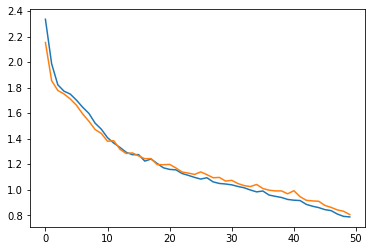

16/16 [==============================] - 0s 4ms/step - loss: 0.8190 - accuracy: 0.7180
loss= 0.818965494632721
acc= 0.7179999947547913
q: 94+9 , true: 100, predicted: 103
q: 34+65, true: 90 , predicted: 99 
q: 44+12, true: 56 , predicted: 56 
q: 56+22, true: 78 , predicted: 78 
q: 6+55 , true: 54 , predicted: 61 
q: 47+69, true: 115, predicted: 116
q: 15+93, true: 108, predicted: 108
q: 27+43, true: 61 , predicted: 70 
q: 1+18 , true: 10 , predicted: 19 
q: 13+16, true: 38 , predicted: 29 


In [11]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Input

input_shape = train_x.shape[1:]

model = keras.Sequential()
model.add(Input(input_shape))
model.add(LSTM(128))
model.add(RepeatVector(DIGITS + 1))
model.add(LSTM(128, return_sequences=True))
model.add(Dense(len(chars), activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

history = model.fit(train_x, train_y, epochs=50, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)

for i in range(10):
  print("q: {}, true: {}, predicted: {}".format( 
      ctable.decode(test_x[i])[::-1], 
      ctable.decode(y_[i]), 
      ctable.decode(test_y[i])
      ))

## GRU

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 128)               54528     
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 3, 128)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 3, 128)            99072     
_________________________________________________________________
dense_1 (Dense)              (None, 3, 12)             1548      
Total params: 155,148
Trainable params: 155,148
Non-trainable params: 0
_________________________________________________________________


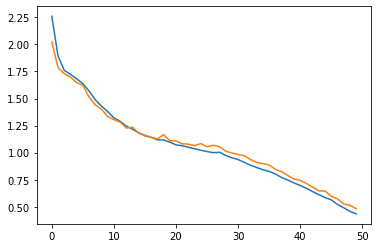

16/16 [==============================] - 0s 3ms/step - loss: 0.4764 - accuracy: 0.8540
loss= 0.47638633847236633
acc= 0.8539999723434448
q: 94+9 , true: 102, predicted: 103
q: 34+65, true: 190, predicted: 99 
q: 44+12, true: 56 , predicted: 56 
q: 56+22, true: 78 , predicted: 78 
q: 6+55 , true: 54 , predicted: 61 
q: 47+69, true: 116, predicted: 116
q: 15+93, true: 108, predicted: 108
q: 27+43, true: 70 , predicted: 70 
q: 1+18 , true: 28 , predicted: 19 
q: 13+16, true: 39 , predicted: 29 


In [12]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Input

input_shape = train_x.shape[1:]

model = keras.Sequential()
model.add(Input(input_shape))
model.add(GRU(128))
model.add(RepeatVector(DIGITS + 1))
model.add(GRU(128, return_sequences=True))
model.add(Dense(len(chars), activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

history = model.fit(train_x, train_y, epochs=50, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)

for i in range(10):
  print("q: {}, true: {}, predicted: {}".format( 
      ctable.decode(test_x[i])[::-1], 
      ctable.decode(y_[i]), 
      ctable.decode(test_y[i])
      ))

## Bidirectional + LSTM

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 256)               144384    
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 3, 256)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 3, 256)            394240    
_________________________________________________________________
dense_2 (Dense)              (None, 3, 12)             3084      
Total params: 541,708
Trainable params: 541,708
Non-trainable params: 0
_________________________________________________________________


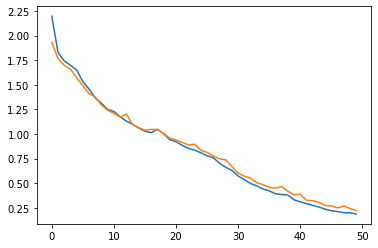

16/16 [==============================] - 0s 5ms/step - loss: 0.2183 - accuracy: 0.9520
loss= 0.21830615401268005
acc= 0.9520000219345093
q: 94+9 , true: 103, predicted: 103
q: 34+65, true: 99 , predicted: 99 
q: 44+12, true: 56 , predicted: 56 
q: 56+22, true: 78 , predicted: 78 
q: 6+55 , true: 60 , predicted: 61 
q: 47+69, true: 116, predicted: 116
q: 15+93, true: 108, predicted: 108
q: 27+43, true: 70 , predicted: 70 
q: 1+18 , true: 18 , predicted: 19 
q: 13+16, true: 39 , predicted: 29 


In [13]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Input

input_shape = train_x.shape[1:]

model = keras.Sequential()
model.add(Input(input_shape))
model.add(Bidirectional(LSTM(128)))
model.add(RepeatVector(DIGITS + 1))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dense(len(chars), activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

history = model.fit(train_x, train_y, epochs=50, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)

for i in range(10):
  print("q: {}, true: {}, predicted: {}".format( 
      ctable.decode(test_x[i])[::-1], 
      ctable.decode(y_[i]), 
      ctable.decode(test_y[i])
      ))

## Bidirectional + GRU

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 256)               109056    
_________________________________________________________________
repeat_vector_3 (RepeatVecto (None, 3, 256)            0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 3, 256)            296448    
_________________________________________________________________
dense_3 (Dense)              (None, 3, 12)             3084      
Total params: 408,588
Trainable params: 408,588
Non-trainable params: 0
_________________________________________________________________


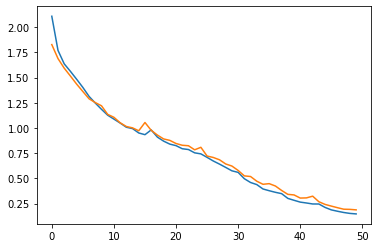

16/16 [==============================] - 0s 4ms/step - loss: 0.2024 - accuracy: 0.9580
loss= 0.2024359405040741
acc= 0.9580000042915344
q: 94+9 , true: 104, predicted: 103
q: 34+65, true: 99 , predicted: 99 
q: 44+12, true: 56 , predicted: 56 
q: 56+22, true: 78 , predicted: 78 
q: 6+55 , true: 62 , predicted: 61 
q: 47+69, true: 116, predicted: 116
q: 15+93, true: 108, predicted: 108
q: 27+43, true: 70 , predicted: 70 
q: 1+18 , true: 18 , predicted: 19 
q: 13+16, true: 29 , predicted: 29 


In [14]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Input

input_shape = train_x.shape[1:]

model = keras.Sequential()
model.add(Input(input_shape))
model.add(Bidirectional(GRU(128)))
model.add(RepeatVector(DIGITS + 1))
model.add(Bidirectional(GRU(128, return_sequences=True)))
model.add(Dense(len(chars), activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

history = model.fit(train_x, train_y, epochs=50, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)

for i in range(10):
  print("q: {}, true: {}, predicted: {}".format( 
      ctable.decode(test_x[i])[::-1], 
      ctable.decode(y_[i]), 
      ctable.decode(test_y[i])
      ))

## stacked

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 5, 128)            72192     
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               131584    
_________________________________________________________________
repeat_vector_4 (RepeatVecto (None, 3, 128)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 3, 128)            131584    
_________________________________________________________________
lstm_7 (LSTM)                (None, 3, 128)            131584    
_________________________________________________________________
dense_4 (Dense)              (None, 3, 12)             1548      
Total params: 468,492
Trainable params: 468,492
Non-trainable params: 0
________________________________________________

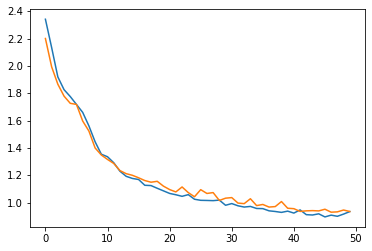

16/16 [==============================] - 0s 4ms/step - loss: 0.9293 - accuracy: 0.6633
loss= 0.9292982220649719
acc= 0.6633333563804626
q: 94+9 , true: 100, predicted: 103
q: 34+65, true: 95 , predicted: 99 
q: 44+12, true: 59 , predicted: 56 
q: 56+22, true: 77 , predicted: 78 
q: 6+55 , true: 60 , predicted: 61 
q: 47+69, true: 115, predicted: 116
q: 15+93, true: 108, predicted: 108
q: 27+43, true: 77 , predicted: 70 
q: 1+18 , true: 24 , predicted: 19 
q: 13+16, true: 34 , predicted: 29 


In [15]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Input

input_shape = train_x.shape[1:]

model = keras.Sequential()
model.add(Input(input_shape))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128))
model.add(RepeatVector(DIGITS + 1))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(Dense(len(chars), activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

history = model.fit(train_x, train_y, epochs=50, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)

for i in range(10):
  print("q: {}, true: {}, predicted: {}".format( 
      ctable.decode(test_x[i])[::-1], 
      ctable.decode(y_[i]), 
      ctable.decode(test_y[i])
      ))